In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("loan_def.csv")

In [5]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.shape

(614, 13)

In [8]:
df = df.drop("Loan_ID", axis=1)

In [9]:
def fill(cname , value=None ,  method_name = None):
    df[cname]  = df[cname].fillna(value , method=method_name)
# Example of bfill
fill("Gender" , "bfill")

# Example for remove rows
df = df.dropna(subset=['Married'])
df = df.dropna(subset=['LoanAmount'])


# Example for encoding and remove Nan for dependents
df["Dependents"].value_counts()
# dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3, '4+': 4}
df["Dependents"]=df["Dependents"].replace("3+" , "3")
fill ("Dependents" , value=0 )

# Example for value fill with others for self emp
fill ("Self_Employed" , value="Others" )
fill ("Credit_History" , value=0 )
df["Loan_Amount_Term"].value_counts()
fill ("Loan_Amount_Term" , value=360 )


# Example for random fill in Credit loan History
# fill ("Credit_History" , method_name="" )
# Not sure how to do it







In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

#ENCODING

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = df['Dependents'].astype(str)
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])





In [13]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [18]:
X = df.drop("Loan_Status" , axis = 1)
y = df["Loan_Status"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create a Decision Tree classifier
# Getting no feature importance for several columns
# clf = DecisionTreeClassifier(max_depth = 2 , criterion =  'entropy', min_samples_leaf= 1, min_samples_split= 2)

clf = DecisionTreeClassifier()

In [20]:
clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [21]:
x_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [22]:
# accuracy = (y_pred == y_test).mean()
accuracy_train = accuracy_score(x_train , y_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("Classification Accuracy Train:", accuracy_train)
print("Classification Accuracy Test:", accuracy_test)


Classification Accuracy Train: 1.0
Classification Accuracy Test: 0.6497175141242938


In [23]:
# Get the feature importance
feature_importance = clf.feature_importances_

# Get feature names
feature_names = X.columns

# Create a list of tuples (feature, importance) and sort it in descending order of importance
sorted_feature_importance = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

LoanAmount: 0.23806733614821277
Credit_History: 0.21309145860501807
ApplicantIncome: 0.1855814557902197
CoapplicantIncome: 0.10932819782219404
Loan_Amount_Term: 0.08413288589126681
Married: 0.03662191511809546
Gender: 0.0344167412059178
Self_Employed: 0.03226025759590949
Property_Area: 0.030201903521744834
Dependents: 0.020842197451708937
Education: 0.015455650849712147


In [24]:
# CROSS VALIDATION

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy_train = accuracy_score(x_train , y_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("Classification Accuracy Train:", accuracy_train)
print("Classification Accuracy Test:", accuracy_test)
print("Best Hyperparameters:", best_params)

Classification Accuracy Train: 1.0
Classification Accuracy Test: 0.751412429378531
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [25]:
# Evaluation Model's Performance 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [26]:
# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

F1-score: 0.8307692307692308
Precision: 0.8181818181818182
Recall: 0.84375


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
report = classification_report(y_test, y_pred)
print(report)

[[ 25  24]
 [ 20 108]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        49
           1       0.82      0.84      0.83       128

    accuracy                           0.75       177
   macro avg       0.69      0.68      0.68       177
weighted avg       0.75      0.75      0.75       177



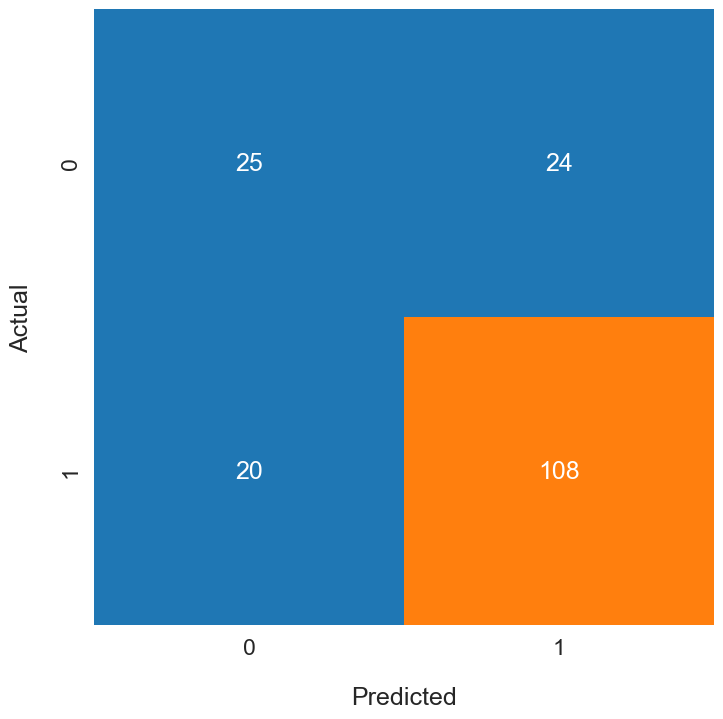

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    cm, annot=True, fmt='d', 
    cbar=False, cmap='tab10', vmax=500 
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

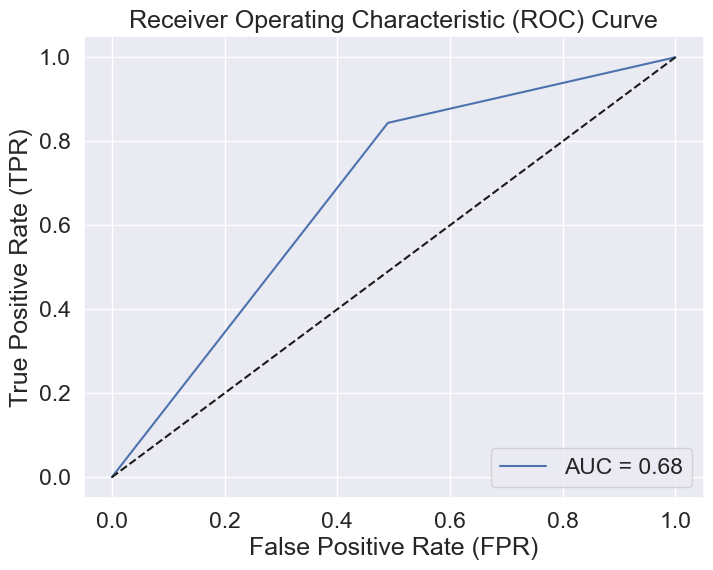

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()





